In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import systema_code as sac

In [44]:
def isnew(lst, newloc):
    
    if len(lst) == 0:
        return True
    
    else:
        for i in range(len(lst)):
            loc = lst[i] 
            
            dist = np.sqrt( (loc[0]-newloc[0])**2 + (loc[1]-newloc[1])**2)
            
            if dist > 1e-4:
                return True
            
            else: 
                pass
            
    return False

In [45]:
def equilpos(r1 = 2.6, k3 = 0.84, fname = None):
    #set parameters for the calculation
    
    r2 = 2
    k1 = 1
    k2 = 1
    l1 = 6
    l2 = 6
    l3 = 10
    d = 20
    R = 10

    #r1 = 2
    #k3 = 0.96
    
    #define the grid
    numpoints = 61

    a1s = np.linspace( -np.pi, np.pi, numpoints)
    a2s = np.linspace( -np.pi, np.pi, numpoints)

    #create the potential
    U = sac.potprep(r1 = r1, r2 = r2, k1 = k1, k2 = k2, k3 = k3, l1 = l1, l2 = l2, l3 = l3, d = d, R = R)
    
    random_searches = 50

    a = 10

    cords_allangles = []

    for idx in range(0,len(a1s),3):
        for idy in range(0,len(a2s),3):

            cords_angle = []

            alpha = a1s[idx]
            beta = a2s[idy]

            for i in range(random_searches):
                x0, y0 = (np.random.rand(2)*a - a/2)

                minx, miny, potata1a2 = sac.mincords(pot = U, alpha1 = alpha, alpha2 = beta, x0 = x0, y0 = y0) 

                if isnew(lst = cords_angle, newloc = [minx,miny] ):
                    cords_angle.append([minx,miny])

                else:
                    pass

            cords_allangles.append(cords_angle)
            
    fig = plt.figure()

    plt.scatter(np.arange(len(cords_allangles)), [len(cords_allangles[i]) for i in range(len(cords_allangles))])

    plt.xlabel("index", fontsize = 16)
    plt.ylabel("# Equiv. pos.", fontsize = 16)

    plt.ylim([0.95,2+0.05])

    tickvals = [1, 2]
    ticklabels = [r"$1$", r"$2$"]

    plt.yticks(tickvals, ticklabels)
    
    if fname == None:
        pass
    else:
        plt.savefig("../figures/" + fname, dpi = 1200, bbox_inches = "tight")
        
    plt.show()

### Check the number of equilibrium positions for the parameters of Fig2.equilpos(r1 = 2.6, k3 = 0.86)(b)

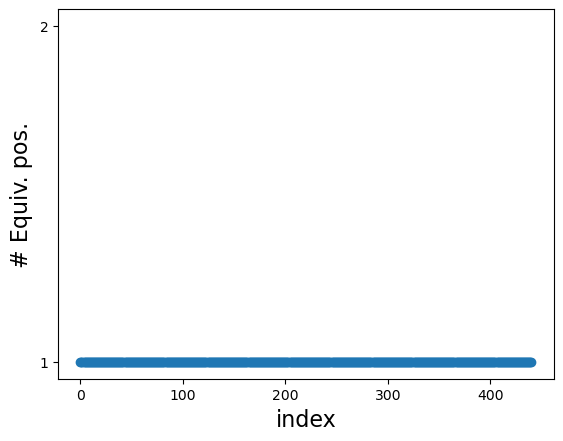

In [28]:
equilpos(r1 = 2.6, k3 = 0.76, fname = "fig2b_076.svg")

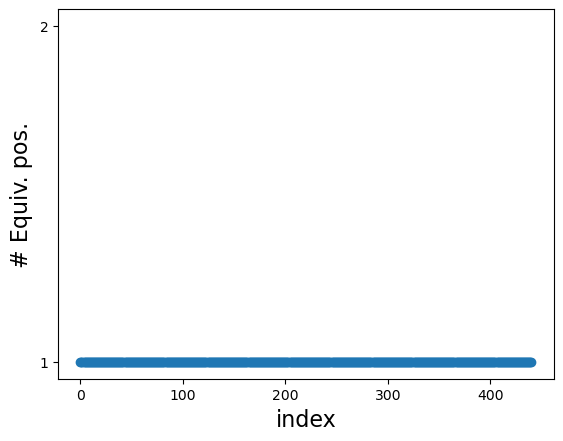

In [29]:
equilpos(r1 = 2.6, k3 = 0.78, fname = "fig2b_078.svg")

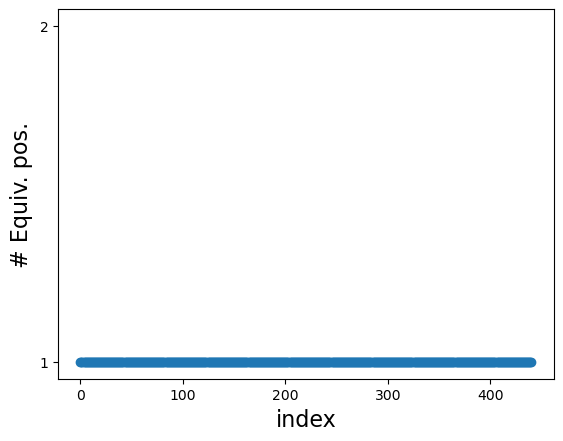

In [30]:
equilpos(r1 = 2.6, k3 = 0.8, fname = "fig2b_080.svg")

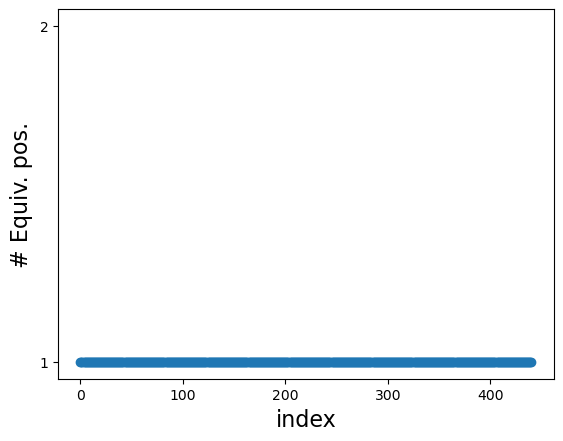

In [31]:
equilpos(r1 = 2.6, k3 = 0.82, fname = "fig2b_082.svg")

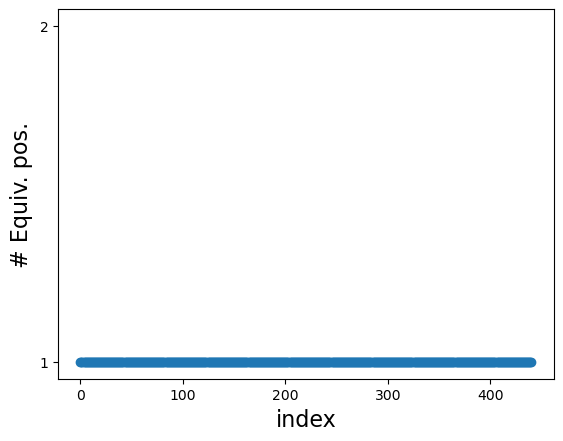

In [32]:
equilpos(r1 = 2.6, k3 = 0.84, fname = "fig2b_084.svg")

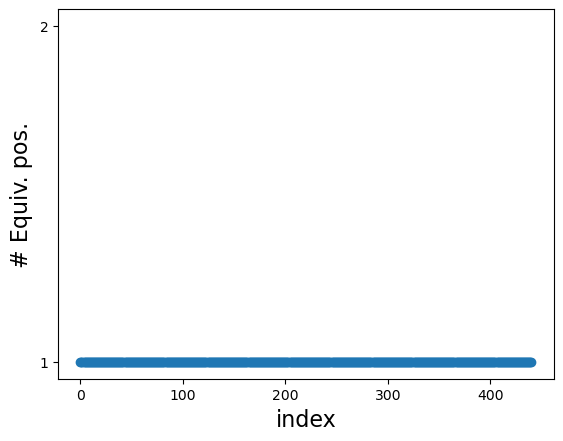

In [33]:
equilpos(r1 = 2.6, k3 = 0.86, fname = "fig2b_086.svg")

### Check the number of equilibrium positions for the parameters of Fig3.(d)

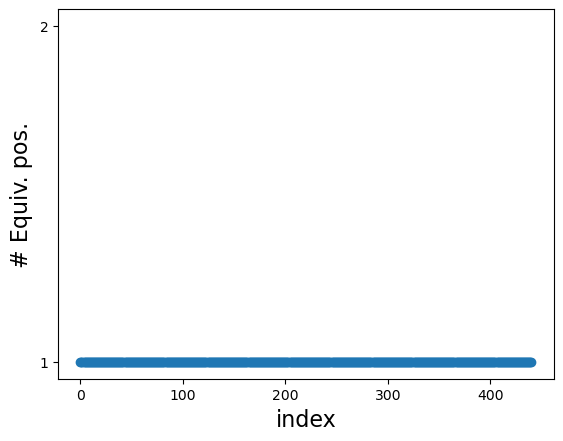

In [34]:
equilpos(r1 = 2, k3 = 0.96, fname = "fig2d_096.svg")

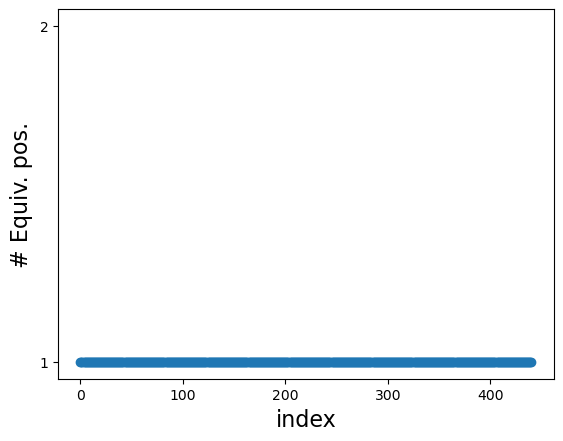

In [35]:
equilpos(r1 = 2, k3 = 1., fname = "fig2d_100.svg")

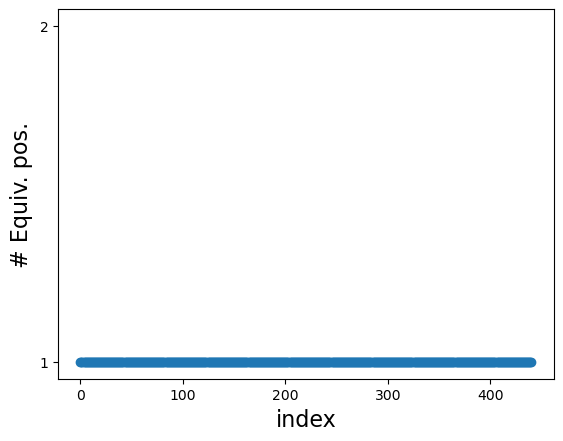

In [36]:
equilpos(r1 = 2, k3 = 1.04, fname = "fig2d_104.svg")

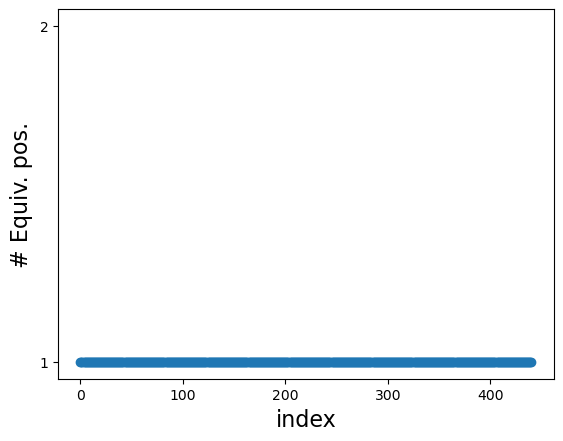

In [37]:
equilpos(r1 = 2, k3 = 1.08, fname = "fig2d_108.svg")

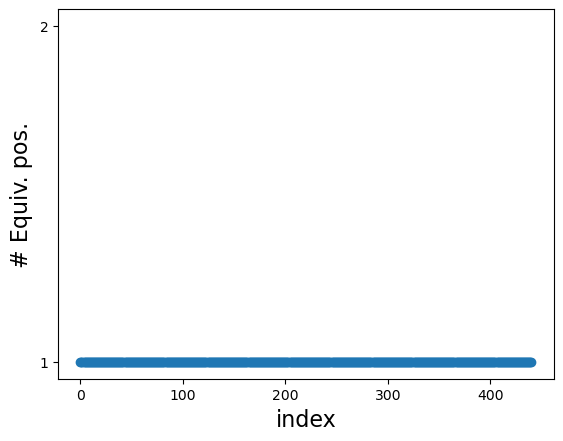

In [38]:
equilpos(r1 = 2, k3 = 1.12, fname = "fig2d_112.svg")